## Iris Data Set and EDA

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
0    50
1    50
2    50
Name: target, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%         

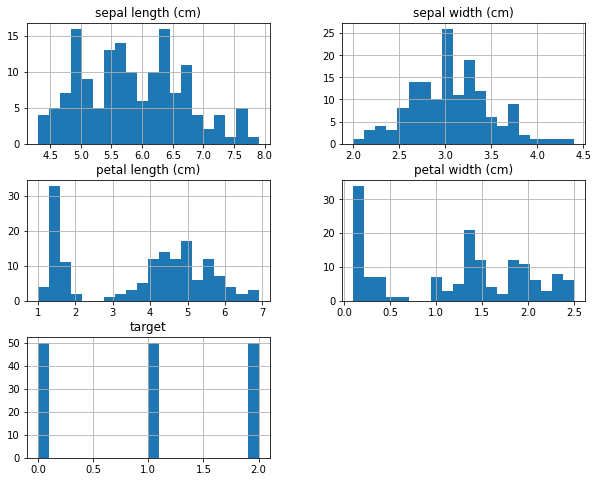

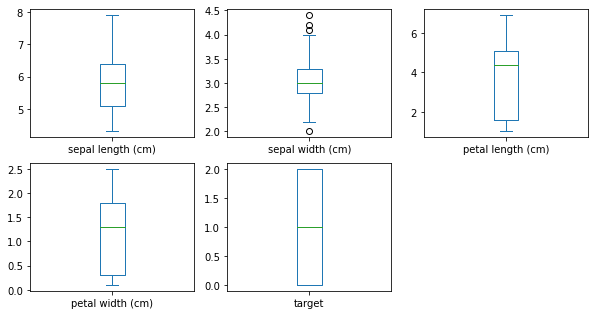

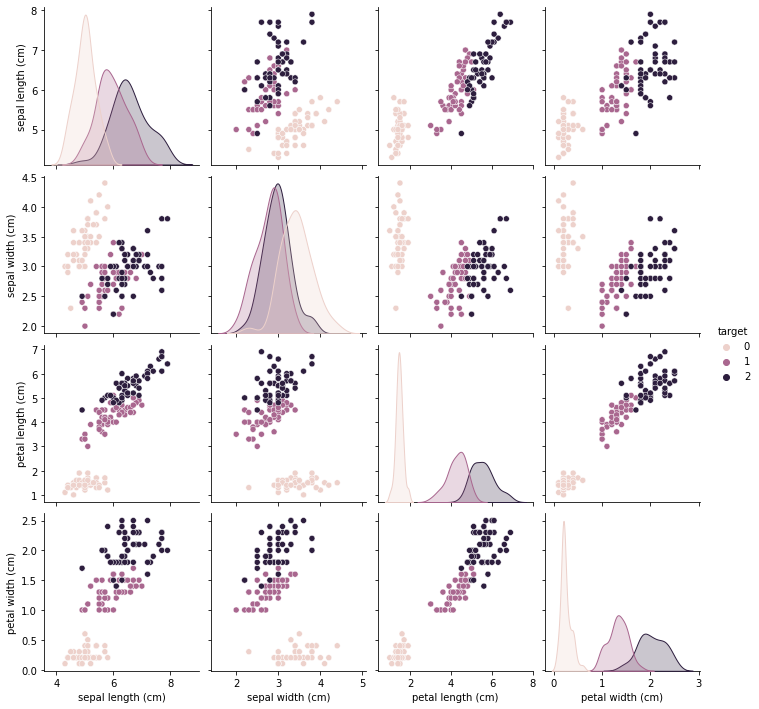

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Print the first 5 rows of the dataset
print(iris_df.head())

# Get the number of observations for each class
print(iris_df['target'].value_counts())

# Get the mean, median, and standard deviation of each feature
print(iris_df.describe())

# Plot histograms for each feature
iris_df.hist(bins=20, figsize=(10, 8))
plt.show()

# Plot box plots for each feature
iris_df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(10, 8))
plt.show()

# Plot pair plots
sns.pairplot(iris_df, hue='target')
plt.show()


## Naive Bayes classifier Algorithm Example

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Print the accuracy of the classifier
print("Accuracy:", gnb.score(X_test, y_test))


Accuracy: 0.9666666666666667


## Validation Matrics for Classification Model

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Confusion Matrix: 
 [[ 8  0  0]
 [ 0  9  1]
 [ 0  0 12]]
Precision:  0.9692307692307692
Recall:  0.9666666666666667
F1-score:  0.9664561403508772


## ROC Curve for multiclass

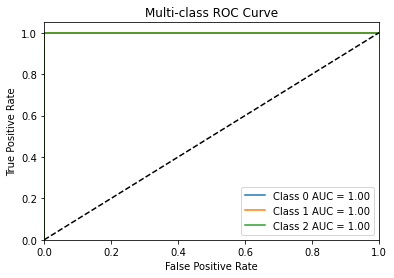

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probability predictions for the test set
y_prob = gnb.predict_proba(X_test)

# Get the false positive rate (fpr), true positive rate (tpr) and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 3

# For each class, calculate the ROC curve and AUC

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot the ROC curves for each class
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d AUC = %0.2f' % (i, roc_auc[i]))

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()



## Model serialization or Deployement

In [17]:
import pickle

# Serialize the model object
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(gnb, f)

# Deserialize the model object
with open('naive_bayes_model.pkl', 'rb') as f:
    gnb_loaded = pickle.load(f)
    
    
# Use the loaded model to make predictions on new data
y_pred = gnb_loaded.predict(X_test)
print(y_pred)


[1 2 2 2 1 0 1 1 2 1 0 2 1 0 2 0 1 0 2 0 2 0 2 1 2 0 0 1 1 0]
